In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
def generate_dataset(kind="moons", n_samples=600, noise=0.3, random_state=42):
    if kind == "moons":
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    elif kind == "circles":
        X, y = make_circles(
            n_samples=n_samples,
            noise=noise,
            factor=0.5,
            random_state=random_state
        )
    elif kind == "blobs":
        X, y = make_classification(
            n_samples=n_samples,
            n_features=2,
            n_redundant=0,
            n_informative=2,
            n_clusters_per_class=1,
            class_sep=2.0,
            random_state=random_state,
        )
    else:
        raise ValueError("Unknown kind.")
    return X, y


In [7]:
dataset_kind = "moons"  # "moons", "circles", or "blobs"

X, y = generate_dataset(kind=dataset_kind, n_samples=800, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


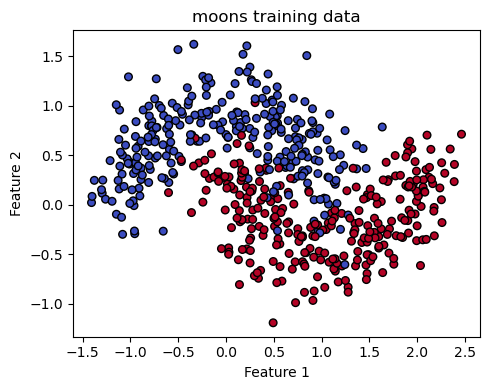

In [9]:
plt.figure(figsize=(5, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor="k", s=30)
plt.title(f"{dataset_kind} training data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


In [21]:
def plot_decision_boundary(
    clf, X, y, title="", h=0.02,
    xlim=None, ylim=None
):
    if xlim is None:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    else:
        x_min, x_max = xlim
    if ylim is None:
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    else:
        y_min, y_max = ylim

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Color-blind–friendly colors
    cmap_light = ListedColormap(["#FBB4AE", "#B3CDE3"])
    cmap_bold = ListedColormap(["#DE2D26", "#3182BD"])

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


=== Weights: uniform ===
k= 1  train=1.000  test=0.925
k= 3  train=0.961  test=0.950
k= 5  train=0.952  test=0.950
k= 7  train=0.952  test=0.958
k=11  train=0.950  test=0.954
k=15  train=0.946  test=0.950
k=21  train=0.948  test=0.967
k=31  train=0.946  test=0.958
k=51  train=0.936  test=0.963


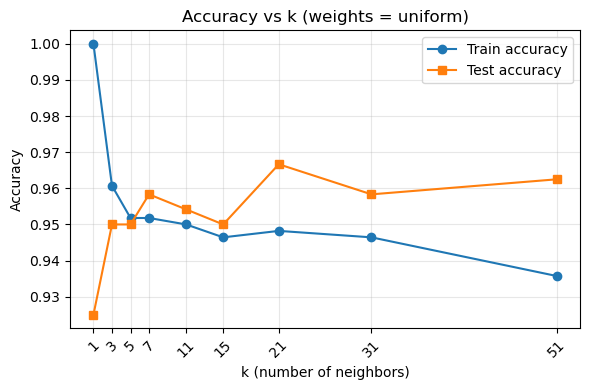

=== Weights: distance ===
k= 1  train=1.000  test=0.925
k= 3  train=1.000  test=0.942
k= 5  train=1.000  test=0.946
k= 7  train=1.000  test=0.950
k=11  train=1.000  test=0.954
k=15  train=1.000  test=0.950
k=21  train=1.000  test=0.954
k=31  train=1.000  test=0.963
k=51  train=1.000  test=0.963


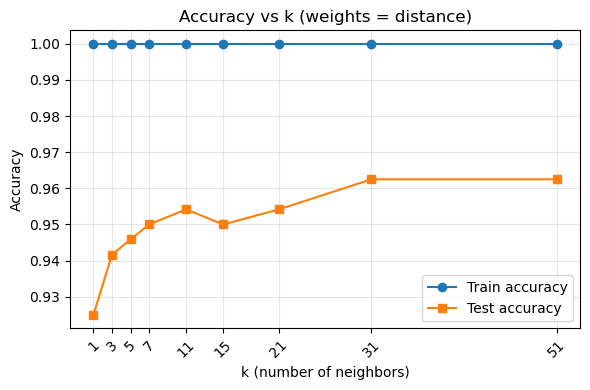

In [13]:
k_values = [1, 3, 5, 7, 11, 15, 21, 31, 51]
weighting_schemes = ["uniform", "distance"]

results = []

for weights in weighting_schemes:
    train_accuracies = []
    test_accuracies = []

    print(f"=== Weights: {weights} ===")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train_scaled, y_train)

        y_train_pred = knn.predict(X_train_scaled)
        y_test_pred = knn.predict(X_test_scaled)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"k={k:2d}  train={train_acc:.3f}  test={test_acc:.3f}")

    results.append({
        "weights": weights,
        "train": train_accuracies,
        "test": test_accuracies,
    })

    # Plot accuracy vs k for this weighting
    plt.figure(figsize=(6, 4))
    plt.plot(k_values, train_accuracies, marker="o", label="Train accuracy")
    plt.plot(k_values, test_accuracies, marker="s", label="Test accuracy")
    plt.xlabel("k (number of neighbors)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs k (weights = {weights})")
    plt.xticks(k_values, rotation=45)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


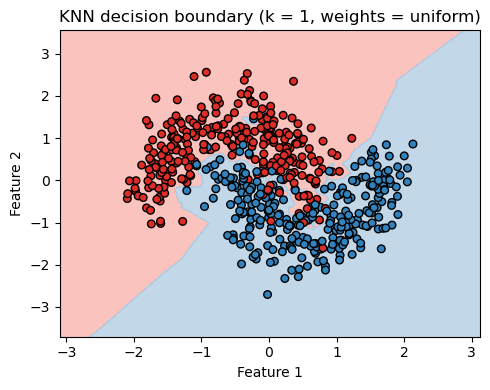

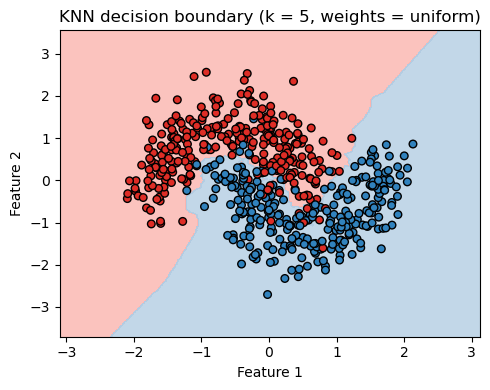

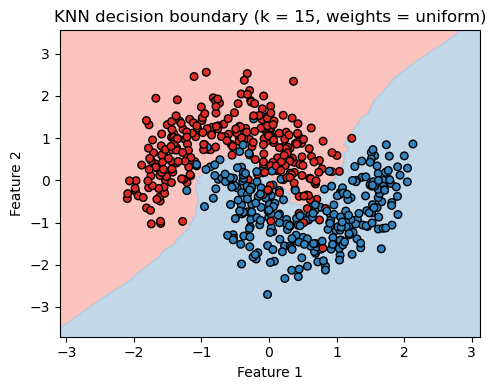

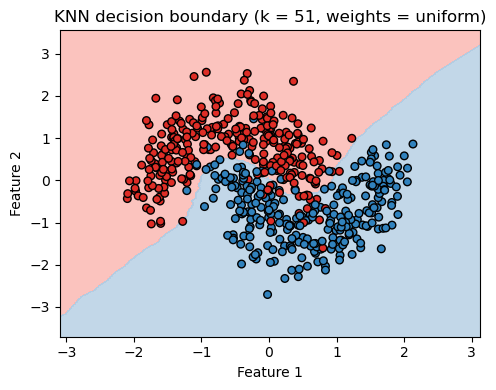

In [15]:
selected_k = [1, 5, 15, 51]
weights = "uniform"  # change to "distance" if you want

xlim = (X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1)
ylim = (X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1)

for k in selected_k:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn.fit(X_train_scaled, y_train)
    title = f"KNN decision boundary (k = {k}, weights = {weights})"
    plot_decision_boundary(knn, X_train_scaled, y_train, title=title, xlim=xlim, ylim=ylim)


Best parameters: {'n_neighbors': 11, 'weights': 'uniform'}
Best CV accuracy: 0.9446428571428573
Test accuracy (best model): 0.9541666666666667

Classification report (best model):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       120
           1       0.97      0.93      0.95       120

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240

Confusion matrix (best model):
[[117   3]
 [  8 112]]


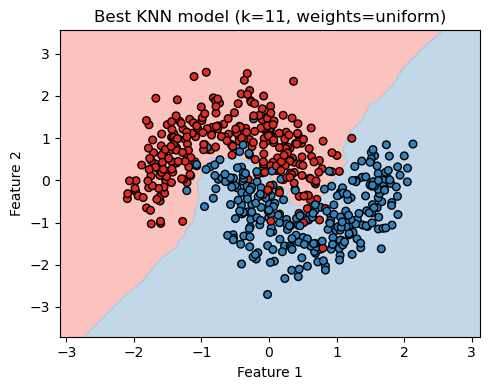

In [16]:
param_grid = {
    "n_neighbors": list(range(1, 51, 2)),
    "weights": ["uniform", "distance"],
}

base_knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    base_knn,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test_scaled)
print("Test accuracy (best model):", accuracy_score(y_test, y_test_pred))

print("\nClassification report (best model):")
print(classification_report(y_test, y_test_pred))

print("Confusion matrix (best model):")
print(confusion_matrix(y_test, y_test_pred))

plot_decision_boundary(
    best_knn,
    X_train_scaled,
    y_train,
    title=f"Best KNN model (k={best_knn.n_neighbors}, weights={best_knn.weights})"
)


Without scaling: test accuracy = 0.954
With scaling:    test accuracy = 0.950

Decision boundary without scaling:


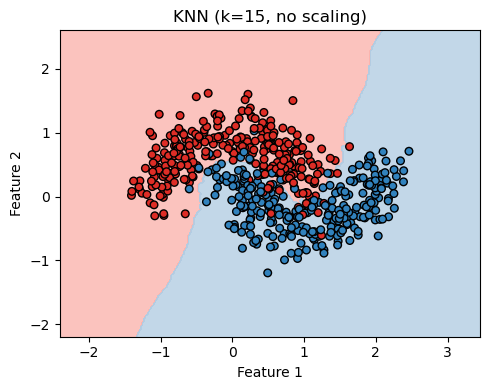

Decision boundary with scaling:


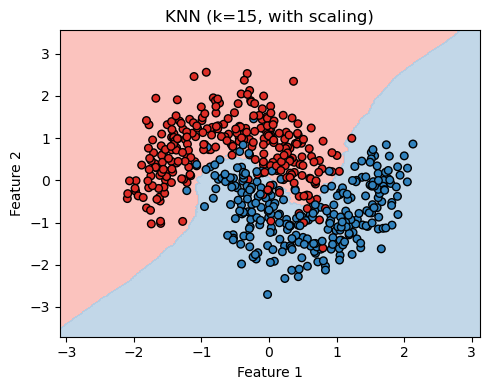

In [17]:
def evaluate_with_without_scaling(k=15, weights="uniform"):
    knn_raw = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn_scaled = KNeighborsClassifier(n_neighbors=k, weights=weights)

    # Raw
    knn_raw.fit(X_train, y_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    acc_raw = accuracy_score(y_test, y_test_pred_raw)

    # Scaled
    knn_scaled.fit(X_train_scaled, y_train)
    y_test_pred_scaled = knn_scaled.predict(X_test_scaled)
    acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

    print(f"Without scaling: test accuracy = {acc_raw:.3f}")
    print(f"With scaling:    test accuracy = {acc_scaled:.3f}")

    print("\nDecision boundary without scaling:")
    plot_decision_boundary(
        knn_raw,
        X_train,
        y_train,
        title=f"KNN (k={k}, no scaling)"
    )

    print("Decision boundary with scaling:")
    plot_decision_boundary(
        knn_scaled,
        X_train_scaled,
        y_train,
        title=f"KNN (k={k}, with scaling)"
    )

evaluate_with_without_scaling(k=15, weights="uniform")
